# <font color='black'><center><center></font> 
![title](img/All.png) 
# <font color='white'><center><center></font> 
# <font><center>Neural Networks & Deep Learning<center></font>
# <font ><center>HW2: Q1<center></font>
## <center>Teacher: Dr. Kalhor<center>
### <center>Student Name: Mohammadali Shakerdargah<center>
### <center>Student Number: 810196487<center>

In [282]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix , classification_report

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense

from sklearn.decomposition import PCA

from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

### Read Data

In [90]:
df = pd.read_csv("sonar.all-data")

In [91]:
df.head(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


### Prepare Data

In [92]:
numCol = []
for i in range(1,61):
    numCol.append(str(i))
numCol_string = ','.join(numCol)
numCol_string

'1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60'

In [93]:
df = pd.read_csv("sonar_new.csv")
df.rename(columns={'61': 'class'}, inplace=True)
df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       208 non-null    float64
 1   2       208 non-null    float64
 2   3       208 non-null    float64
 3   4       208 non-null    float64
 4   5       208 non-null    float64
 5   6       208 non-null    float64
 6   7       208 non-null    float64
 7   8       208 non-null    float64
 8   9       208 non-null    float64
 9   10      208 non-null    float64
 10  11      208 non-null    float64
 11  12      208 non-null    float64
 12  13      208 non-null    float64
 13  14      208 non-null    float64
 14  15      208 non-null    float64
 15  16      208 non-null    float64
 16  17      208 non-null    float64
 17  18      208 non-null    float64
 18  19      208 non-null    float64
 19  20      208 non-null    float64
 20  21      208 non-null    float64
 21  22      208 non-null    float64
 22  23

In [95]:
numOfNAN = df.isna().sum()
for nan in numOfNAN:
    if nan == 1:
        print('we have nan in df')

In [96]:
for i in range(len(df['class'])):
    if(df['class'][i] == 'R'):
        df.at[i, 'class'] = 1
    else:
        df.at[i, 'class'] = 0
df

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


### Data Test & Train Selection

In [97]:
df_train = df.sample(frac=0.8)
x_train = df_train.iloc[:, 0:60]
y_train = df_train.iloc[:, 60:61]
df_test = df.loc[~df.index.isin(x_train.index)]
x_test = df_test.iloc[:, 0:60]
y_test = df_test.iloc[:, 60:61]


X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
# convert labels to one-hot vectors
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

### Modeling

In [98]:
#Creating a model with 2 hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(60,)))	#Hidden Layer 1
model.add(Dense(512, activation='relu'))	#Hidden Layer 2
model.add(Dense(2, activation='softmax')) #Last layer with one output per class
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


### Compiling, Fitting, and Plots

In [99]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 38ms/step - loss: 0.7230 - accuracy: 0.5530 - val_loss: 0.6888 - val_accuracy: 0.4412
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.6886 - accuracy: 0.5000 - val_loss: 0.6196 - val_accuracy: 0.8529
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.5981 - accuracy: 0.8030 - val_loss: 0.5676 - val_accuracy: 0.7353
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 0.5592 - accuracy: 0.7348 - val_loss: 0.5436 - val_accuracy: 0.8529
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 0.5227 - accuracy: 0.8030 - val_loss: 0.4771 - val_accuracy: 0.8235
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 0.4922 - accuracy: 0.7652 - val_loss: 0.4282 - val_accuracy: 0.8824
Epoch 7/20
5/5 [==============================] - 0s 7ms/step - loss: 0.4588 - accuracy: 0.7955 - val_loss: 0.3965 - val_accuracy: 0.8529
Epoch 8/20
5/5 [=================

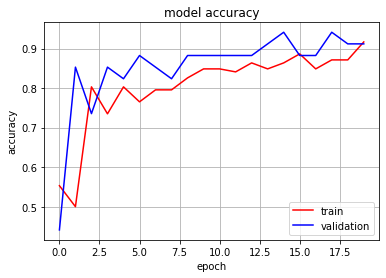

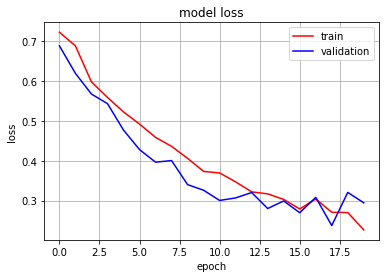

In [101]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

### ٍExact number of error and accuracy, and Confusion matrix

In [120]:
Y_pred = model.predict(X_test)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)

2/2 [==============================] - 0s 999us/step - loss: 0.3064 - accuracy: 0.8571
Test Loss 0.30638477206230164
Test Accuracy 0.8571428656578064
confusion matrix=
 [[16  4]
 [ 2 20]]


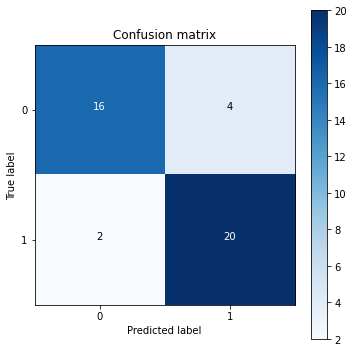

In [123]:
class_names = [0,1]
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = [0,1]
plot_confusion_matrix(confusion_mtx, class_names)

### stochastic mini batch based Modeling: Size 32

In [124]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 58ms/step - loss: 0.3593 - accuracy: 0.8485 - val_loss: 0.5831 - val_accuracy: 0.6765
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.2647 - accuracy: 0.8864 - val_loss: 0.2886 - val_accuracy: 0.8529
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 0.2857 - accuracy: 0.8485 - val_loss: 0.2594 - val_accuracy: 0.9118
Epoch 4/20
5/5 [==============================] - 0s 9ms/step - loss: 0.2459 - accuracy: 0.8939 - val_loss: 0.3642 - val_accuracy: 0.8824
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.1968 - accuracy: 0.9394 - val_loss: 0.2406 - val_accuracy: 0.9118
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: 0.1827 - accuracy: 0.9318 - val_loss: 0.3118 - val_accuracy: 0.8529
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.2423 - accuracy: 0.8788 - val_loss: 0.2835 - val_accuracy: 0.8824
Epoch 8/20
5/5 [===============

2/2 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.9286
Test Loss 0.24725297093391418
Test Accuracy 0.9285714030265808
confusion matrix=
 [[20  0]
 [ 3 19]]


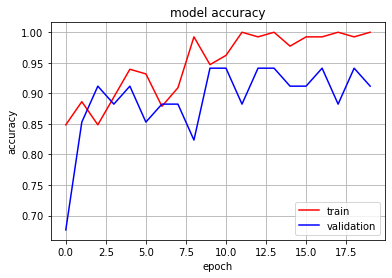

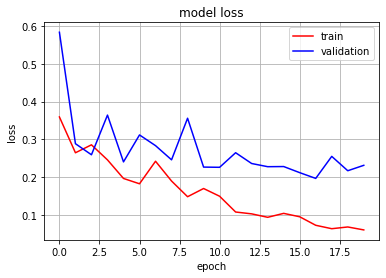

In [126]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Y_pred = model.predict(X_test)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)

### stochastic mini batch based Modeling: Size 64

In [135]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 0s 60ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.2100 - val_accuracy: 0.7941
Epoch 2/20
3/3 [==============================] - 0s 9ms/step - loss: 0.1464 - accuracy: 0.9242 - val_loss: 1.0445 - val_accuracy: 0.7647
Epoch 3/20
3/3 [==============================] - 0s 9ms/step - loss: 0.1048 - accuracy: 0.9697 - val_loss: 0.4543 - val_accuracy: 0.8824
Epoch 4/20
3/3 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5259 - val_accuracy: 0.8824
Epoch 5/20
3/3 [==============================] - 0s 9ms/step - loss: 0.0410 - accuracy: 0.9924 - val_loss: 0.7253 - val_accuracy: 0.8529
Epoch 6/20
3/3 [==============================] - 0s 8ms/step - loss: 0.0751 - accuracy: 0.9697 - val_loss: 0.4429 - val_accuracy: 0.9412
Epoch 7/20
3/3 [==============================] - 0s 9ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.4488 - val_accuracy: 0.8824
Epoch 8/20
3/3 [=================

2/2 [==============================] - 0s 1000us/step - loss: 0.2773 - accuracy: 0.9286
Test Loss 0.27726852893829346
Test Accuracy 0.9285714030265808
confusion matrix=
 [[20  0]
 [ 3 19]]


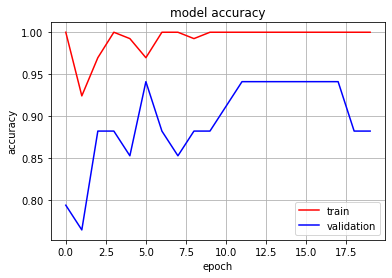

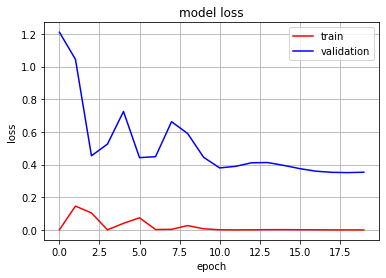

In [136]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Y_pred = model.predict(X_test)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)

### stochastic mini batch based Modeling: Size 128

In [141]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
2/2 [==============================] - 0s 95ms/step - loss: 3.9177e-04 - accuracy: 1.0000 - val_loss: 0.4277 - val_accuracy: 0.9118
Epoch 2/20
2/2 [==============================] - 0s 9ms/step - loss: 1.3238e-04 - accuracy: 1.0000 - val_loss: 0.5245 - val_accuracy: 0.8824
Epoch 3/20
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.4959 - val_accuracy: 0.9412
Epoch 4/20
2/2 [==============================] - 0s 11ms/step - loss: 0.0530 - accuracy: 0.9697 - val_loss: 0.4587 - val_accuracy: 0.9118
Epoch 5/20
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2254 - val_accuracy: 0.7941
Epoch 6/20
2/2 [==============================] - 0s 10ms/step - loss: 0.1303 - accuracy: 0.9394 - val_loss: 0.5085 - val_accuracy: 0.9412
Epoch 7/20
2/2 [==============================] - 0s 9ms/step - loss: 3.8992e-04 - accuracy: 1.0000 - val_loss: 0.5496 - val_accuracy: 0.8824
Epoch 8/20
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.8571
Test Loss 0.46860232949256897
Test Accuracy 0.8571428656578064
confusion matrix=
 [[20  0]
 [ 6 16]]


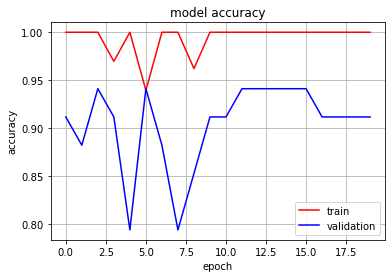

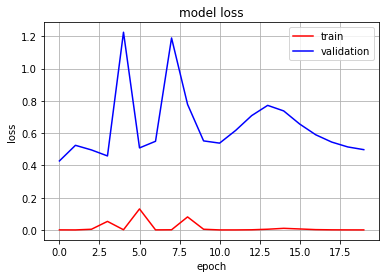

In [142]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Y_pred = model.predict(X_test)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)

### َActivation Functions: reLU

In [143]:
#Creating a model with 2 hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(60,)))	#Hidden Layer 1
model.add(Dense(512, activation='relu'))	#Hidden Layer 2
model.add(Dense(2, activation='softmax')) #Last layer with one output per class
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 38ms/step - loss: 0.2957 - accuracy: 0.8712 - val_loss: 0.4191 - val_accuracy: 0.7647
Epoch 2/20
5/5 [==============================] - 0s 6ms/step - loss: 0.2416 - accuracy: 0.9015 - val_loss: 0.2505 - val_accuracy: 0.8529
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.2475 - accuracy: 0.8712 - val_loss: 0.3911 - val_accuracy: 0.8235
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.2442 - accuracy: 0.8939 - val_loss: 0.2277 - val_accuracy: 0.9118
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 0.2487 - accuracy: 0.8864 - val_loss: 0.3286 - val_accuracy: 0.8824
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 0.2630 - accuracy: 0.8712 - val_loss: 0.2636 - val_accuracy: 0.9118
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.1765 - accuracy: 0.9394 - val_loss: 0.2133 - val_accuracy: 0.9118
Epoch 8/20
5/5 [=================

2/2 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.8810
Test Loss 0.2488042563199997
Test Accuracy 0.8809523582458496
confusion matrix=
 [[18  2]
 [ 3 19]]


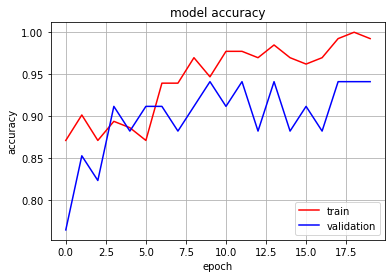

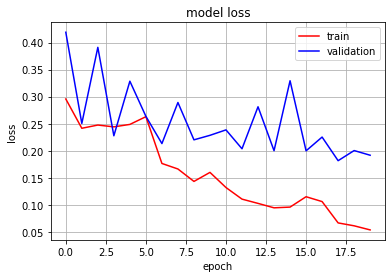

In [147]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Y_pred = model.predict(X_test)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)

### َActivation Functions: Sigmoid

In [148]:
#Creating a model with 2 hidden layers
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(60,)))	#Hidden Layer 1
model.add(Dense(512, activation='sigmoid'))	#Hidden Layer 2
model.add(Dense(2, activation='softmax')) #Last layer with one output per class
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 41ms/step - loss: 0.8599 - accuracy: 0.5000 - val_loss: 1.0929 - val_accuracy: 0.4412
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.8675 - accuracy: 0.4697 - val_loss: 0.8318 - val_accuracy: 0.5588
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.7571 - accuracy: 0.5152 - val_loss: 0.8776 - val_accuracy: 0.4412
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.8028 - accuracy: 0.5000 - val_loss: 0.7804 - val_accuracy: 0.5588
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 0.7929 - accuracy: 0.5455 - val_loss: 0.6910 - val_accuracy: 0.4412
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 0.7268 - accuracy: 0.4697 - val_loss: 0.6766 - val_accuracy: 0.5588
Epoch 7/20
5/5 [==============================] - 0s 7ms/step - loss: 0.6861 - accuracy: 0.5455 - val_loss: 0.6745 - val_accuracy: 0.5882
Epoch 8/20
5/5 [=================

2/2 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.6429
Test Loss 0.651374101638794
Test Accuracy 0.6428571343421936
confusion matrix=
 [[13  7]
 [ 8 14]]


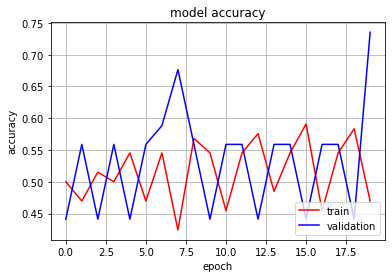

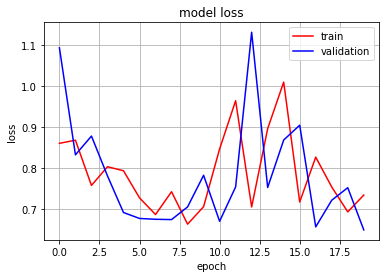

In [150]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Y_pred = model.predict(X_test)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)

### َActivation Functions:  tanh

In [151]:
#Creating a model with 2 hidden layers
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(60,)))	#Hidden Layer 1
model.add(Dense(512, activation='tanh'))	#Hidden Layer 2
model.add(Dense(2, activation='softmax')) #Last layer with one output per class
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 40ms/step - loss: 0.8061 - accuracy: 0.5455 - val_loss: 0.8249 - val_accuracy: 0.5588
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.7535 - accuracy: 0.5379 - val_loss: 0.6949 - val_accuracy: 0.4706
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6059 - accuracy: 0.6515 - val_loss: 0.4618 - val_accuracy: 0.7647
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.5193 - accuracy: 0.7424 - val_loss: 0.4710 - val_accuracy: 0.7941
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 0.5084 - accuracy: 0.7273 - val_loss: 0.3963 - val_accuracy: 0.9118
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 0.5313 - accuracy: 0.7424 - val_loss: 0.3845 - val_accuracy: 0.8824
Epoch 7/20
5/5 [==============================] - 0s 7ms/step - loss: 0.4730 - accuracy: 0.7727 - val_loss: 0.4148 - val_accuracy: 0.7353
Epoch 8/20
5/5 [=================

2/2 [==============================] - 0s 999us/step - loss: 0.4449 - accuracy: 0.7857
Test Loss 0.4449012279510498
Test Accuracy 0.7857142686843872
confusion matrix=
 [[18  2]
 [ 7 15]]


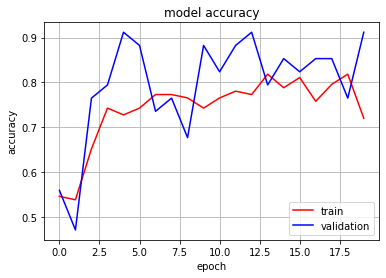

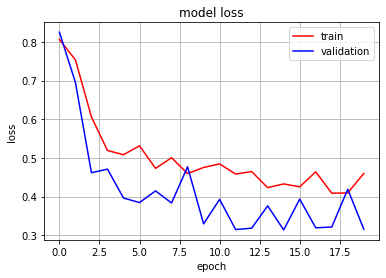

In [153]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Y_pred = model.predict(X_test)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)

### Neural Network with 4 hidden layers:

In [154]:
#Creating a model with 2 hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(60,)))	#Hidden Layer 1
model.add(Dense(512, activation='relu'))	
model.add(Dense(512, activation='relu'))	
model.add(Dense(512, activation='relu'))	
model.add(Dense(2, activation='softmax')) #Last layer with one output per class
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 1026      
Total params: 820,226
Trainable params: 820,226
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 48ms/step - loss: 0.7030 - accuracy: 0.5152 - val_loss: 0.6559 - val_accuracy: 0.7059
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.6227 - accuracy: 0.7197 - val_loss: 0.5497 - val_accuracy: 0.6765
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.5586 - accuracy: 0.7576 - val_loss: 0.4217 - val_accuracy: 0.7941
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 0.5159 - accuracy: 0.7576 - val_loss: 0.5485 - val_accuracy: 0.6765
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.5830 - accuracy: 0.7121 - val_loss: 0.6075 - val_accuracy: 0.6176
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.4578 - accuracy: 0.7803 - val_loss: 0.4152 - val_accuracy: 0.7941
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.5022 - accuracy: 0.7197 - val_loss: 0.3471 - val_accuracy: 0.9412
Epoch 8/20
5/5 [===========

2/2 [==============================] - 0s 1ms/step - loss: 0.2516 - accuracy: 0.9048
Test Loss 0.25156891345977783
Test Accuracy 0.9047619104385376
confusion matrix=
 [[20  0]
 [ 4 18]]


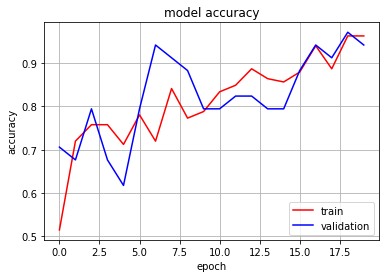

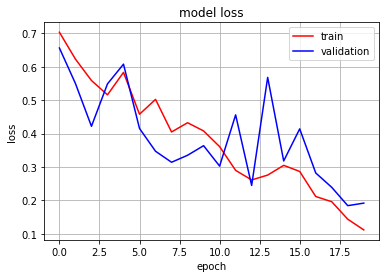

In [156]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Y_pred = model.predict(X_test)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)

### Neural Network with 6 hidden layers:

In [157]:
#Creating a model with 2 hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(60,)))	#Hidden Layer 1
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax')) #Last layer with one output per class
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_33 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_38 (Dense)             (None, 2)               

In [158]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 60ms/step - loss: 0.7005 - accuracy: 0.5606 - val_loss: 0.6679 - val_accuracy: 0.5588
Epoch 2/20
5/5 [==============================] - 0s 19ms/step - loss: 0.6546 - accuracy: 0.6061 - val_loss: 0.6645 - val_accuracy: 0.5882
Epoch 3/20
5/5 [==============================] - 0s 17ms/step - loss: 0.6099 - accuracy: 0.6818 - val_loss: 0.5365 - val_accuracy: 0.6471
Epoch 4/20
5/5 [==============================] - 0s 17ms/step - loss: 0.5611 - accuracy: 0.6894 - val_loss: 0.4938 - val_accuracy: 0.8235
Epoch 5/20
5/5 [==============================] - 0s 16ms/step - loss: 0.4806 - accuracy: 0.7879 - val_loss: 0.6304 - val_accuracy: 0.6471
Epoch 6/20
5/5 [==============================] - 0s 17ms/step - loss: 0.6377 - accuracy: 0.7045 - val_loss: 0.5754 - val_accuracy: 0.7059
Epoch 7/20
5/5 [==============================] - 0s 19ms/step - loss: 0.5645 - accuracy: 0.7576 - val_loss: 0.4733 - val_accuracy: 0.8235
Epoch 8/20
5/5 [===========

2/2 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.7857
Test Loss 0.39984261989593506
Test Accuracy 0.7857142686843872
confusion matrix=
 [[20  0]
 [ 9 13]]


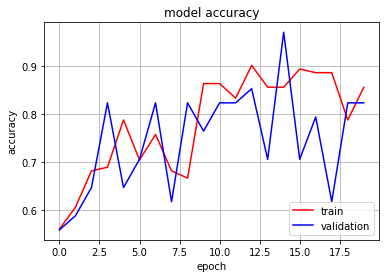

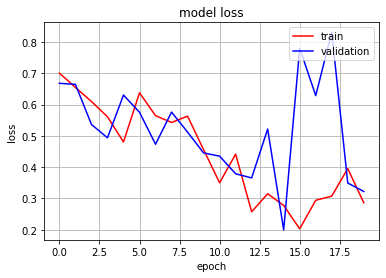

In [159]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Y_pred = model.predict(X_test)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)

### Neural Network with 2 hidden layers and 20 neurons:

In [202]:
#Creating a model with 2 hidden layers
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(60,)))	#Hidden Layer 1
model.add(Dense(20, activation='relu'))	
model.add(Dense(2, activation='softmax')) #Last layer with one output per class
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 20)                1220      
_________________________________________________________________
dense_57 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 42        
Total params: 1,682
Trainable params: 1,682
Non-trainable params: 0
_________________________________________________________________


In [203]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)
X_train

Epoch 1/20
5/5 [==============================] - 1s 142ms/step - loss: 0.7182 - accuracy: 0.5455 - val_loss: 0.7044 - val_accuracy: 0.5588
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5455 - val_loss: 0.6927 - val_accuracy: 0.5588
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.5455 - val_loss: 0.6871 - val_accuracy: 0.5294
Epoch 4/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6758 - accuracy: 0.5985 - val_loss: 0.6848 - val_accuracy: 0.5588
Epoch 5/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6704 - accuracy: 0.6818 - val_loss: 0.6793 - val_accuracy: 0.5882
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.6667 - val_loss: 0.6692 - val_accuracy: 0.5882
Epoch 7/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6576 - accuracy: 0.6667 - val_loss: 0.6618 - val_accuracy: 0.5294
Epoch 8/20
5/5 [================

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
149,0.0207,0.0535,0.0334,0.0818,0.0740,0.0324,0.0918,0.1070,0.1553,0.1234,...,0.0171,0.0033,0.0050,0.0190,0.0103,0.0121,0.0042,0.0090,0.0070,0.0099
91,0.0253,0.0808,0.0507,0.0244,0.1724,0.3823,0.3729,0.3583,0.3429,0.2197,...,0.0085,0.0178,0.0073,0.0079,0.0038,0.0116,0.0033,0.0039,0.0081,0.0053
142,0.0526,0.0563,0.1219,0.1206,0.0246,0.1022,0.0539,0.0439,0.2291,0.1632,...,0.0380,0.0339,0.0149,0.0335,0.0376,0.0174,0.0132,0.0103,0.0364,0.0208
54,0.0132,0.0080,0.0188,0.0141,0.0436,0.0668,0.0609,0.0131,0.0899,0.0922,...,0.0136,0.0044,0.0028,0.0021,0.0022,0.0048,0.0138,0.0140,0.0028,0.0064
125,0.0228,0.0853,0.1000,0.0428,0.1117,0.1651,0.1597,0.2116,0.3295,0.3517,...,0.0159,0.0172,0.0191,0.0260,0.0140,0.0125,0.0116,0.0093,0.0012,0.0036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.0261,0.0266,0.0223,0.0749,0.1364,0.1513,0.1316,0.1654,0.1864,0.2013,...,0.0135,0.0222,0.0175,0.0127,0.0022,0.0124,0.0054,0.0021,0.0028,0.0023
116,0.0094,0.0333,0.0306,0.0376,0.1296,0.1795,0.1909,0.1692,0.1870,0.1725,...,0.0216,0.0153,0.0112,0.0241,0.0164,0.0055,0.0078,0.0055,0.0091,0.0067
118,0.0363,0.0478,0.0298,0.0210,0.1409,0.1916,0.1349,0.1613,0.1703,0.1444,...,0.0250,0.0115,0.0190,0.0055,0.0096,0.0050,0.0066,0.0114,0.0073,0.0033
83,0.0217,0.0340,0.0392,0.0236,0.1081,0.1164,0.1398,0.1009,0.1147,0.1777,...,0.0095,0.0031,0.0103,0.0078,0.0077,0.0094,0.0031,0.0030,0.0013,0.0069


2/2 [==============================] - 0s 500us/step - loss: 0.5062 - accuracy: 0.7857
Test Loss 0.5062450170516968
Test Accuracy 0.7857142686843872
confusion matrix=
 [[19  1]
 [ 8 14]]


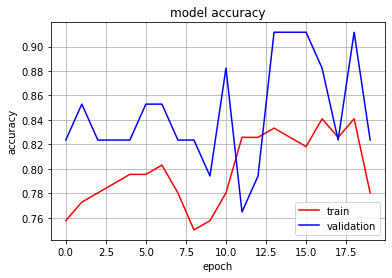

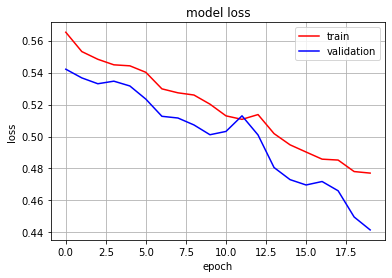

In [172]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Y_pred = model.predict(X_test)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)

### Implementation of PCA on 4-hidden-layered NN

In [339]:
t_beg = time.time()
#Creating a model with 2 hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(60,)))	#Hidden Layer 1
model.add(Dense(512, activation='relu'))	
model.add(Dense(512, activation='relu'))	
model.add(Dense(512, activation='relu'))	
model.add(Dense(2, activation='softmax')) #Last layer with one output per class
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)
t_end = time.time()
print(t_end - t_beg)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 512)               31232     
_________________________________________________________________
dense_250 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_251 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_252 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_253 (Dense)            (None, 2)                 1026      
Total params: 820,226
Trainable params: 820,226
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 0s 44ms/step - loss: 0.6761 - accuracy: 0.5530 - val_loss: 0.60

In [275]:
import time
#Creating a model with 2 hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(19,)))	#Hidden Layer 1
model.add(Dense(512, activation='relu'))	
model.add(Dense(512, activation='relu'))	
model.add(Dense(512, activation='relu'))	
model.add(Dense(2, activation='softmax')) #Last layer with one output per class
model.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 512)               10240     
_________________________________________________________________
dense_75 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_76 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_77 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_78 (Dense)             (None, 2)                 1026      
Total params: 799,234
Trainable params: 799,234
Non-trainable params: 0
_________________________________________________________________


In [276]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
Y_train_pca = Y_train
Y_test_pca = Y_test

time_begin = time.time()
pca = PCA(.96)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
time_end = time.time()

X_train_pca_df = pd.DataFrame(X_train_pca[0:,0:])
X_test_pca_df = pd.DataFrame(X_test_pca[0:,0:])
pca.n_components_

19

In [280]:
print(time_end - time_begin)

0.012992143630981445


In [277]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_pca, Y_train_pca, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 42ms/step - loss: 0.6730 - accuracy: 0.6212 - val_loss: 0.6035 - val_accuracy: 0.7059
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.5762 - accuracy: 0.6515 - val_loss: 0.4652 - val_accuracy: 0.7353
Epoch 3/20
5/5 [==============================] - 0s 13ms/step - loss: 0.4276 - accuracy: 0.8106 - val_loss: 0.3022 - val_accuracy: 0.8824
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.3002 - accuracy: 0.8864 - val_loss: 0.2311 - val_accuracy: 0.9118
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.2371 - accuracy: 0.9394 - val_loss: 0.2386 - val_accuracy: 0.9118
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1750 - accuracy: 0.9394 - val_loss: 0.2098 - val_accuracy: 0.8824
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0915 - accuracy: 0.9848 - val_loss: 0.2455 - val_accuracy: 0.9118
Epoch 8/20
5/5 [===========

2/2 [==============================] - 0s 1000us/step - loss: 0.5082 - accuracy: 0.8810
Test Loss 0.5081843733787537
Test Accuracy 0.8809523582458496
confusion matrix=
 [[20  0]
 [ 5 17]]


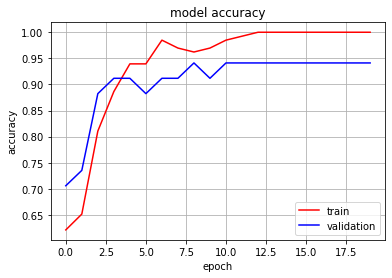

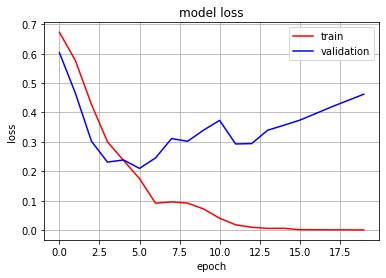

In [279]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Y_pred = model.predict(X_test_pca_df)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test_pca_df, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)

### Implementation of Auto-Encoder on 4-hidden-layered NN

Epoch 1/20
6/6 - 0s - loss: 0.7047 - val_loss: 0.1495
Epoch 2/20
6/6 - 0s - loss: 0.3756 - val_loss: 0.1425
Epoch 3/20
6/6 - 0s - loss: 0.2284 - val_loss: 0.1338
Epoch 4/20
6/6 - 0s - loss: 0.1382 - val_loss: 0.1239
Epoch 5/20
6/6 - 0s - loss: 0.0978 - val_loss: 0.1128
Epoch 6/20
6/6 - 0s - loss: 0.0730 - val_loss: 0.1017
Epoch 7/20
6/6 - 0s - loss: 0.0590 - val_loss: 0.0932
Epoch 8/20
6/6 - 0s - loss: 0.0499 - val_loss: 0.0871
Epoch 9/20
6/6 - 0s - loss: 0.0430 - val_loss: 0.0827
Epoch 10/20
6/6 - 0s - loss: 0.0384 - val_loss: 0.0798
Epoch 11/20
6/6 - 0s - loss: 0.0334 - val_loss: 0.0758
Epoch 12/20
6/6 - 0s - loss: 0.0318 - val_loss: 0.0704
Epoch 13/20
6/6 - 0s - loss: 0.0322 - val_loss: 0.0654
Epoch 14/20
6/6 - 0s - loss: 0.0303 - val_loss: 0.0617
Epoch 15/20
6/6 - 0s - loss: 0.0286 - val_loss: 0.0583
Epoch 16/20
6/6 - 0s - loss: 0.0252 - val_loss: 0.0538
Epoch 17/20
6/6 - 0s - loss: 0.0246 - val_loss: 0.0488
Epoch 18/20
6/6 - 0s - loss: 0.0232 - val_loss: 0.0462
Epoch 19/20
6/6 - 0

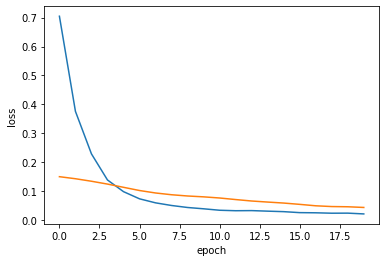

Time it took:  3.3630807399749756


In [331]:
time_begin = time.time()
n_inputs = 60
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 3
e = Dense(n_inputs/2)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 15
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(n_inputs/2)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 3
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

model.compile(optimizer='adam', loss='mse')
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=20, batch_size=32, verbose=2, 
                    validation_data=(X_test,X_test))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

encoder = Model(inputs=visible, outputs=bottleneck)
# encode the train data
X_train_encoded = encoder.predict(X_train)
# encode the test data
X_test_encoded = encoder.predict(X_test)
time_end = time.time()
print("Time it took: ",(time_end-time_begin))

In [332]:

X_train_encoded_df = pd.DataFrame(X_train_encoded[0:,0:])
X_test_encoded_df = pd.DataFrame(X_test_encoded[0:,0:])
X_train_encoded_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.239648,0.121832,-0.059929,0.051002,0.243151,-0.173472,0.029215,-0.253797,0.080252,-0.177782,-0.027381,0.159316,-0.217482,0.037130,0.184699
1,0.734857,-0.477031,-0.285283,-0.712238,0.042646,0.150557,-0.577848,-0.006553,-0.588455,0.132329,-0.822302,0.274827,-0.583796,-0.341485,0.526569
2,0.651332,-0.083266,-0.005300,-0.597790,0.450743,0.228169,0.091746,0.099109,-0.145198,-0.006037,-0.687917,0.172119,-0.780382,-0.155139,0.440725
3,0.478253,-0.146877,-0.201164,-0.366756,0.253083,0.083232,-0.208639,-0.141727,-0.071874,0.013861,-0.350149,0.170061,-0.325981,-0.244972,0.232532
4,0.776687,-0.595748,-0.339752,-0.469006,-0.050726,-0.140794,-0.737241,-0.128632,-0.778785,-0.042911,-0.507978,0.256984,-0.263679,-0.370800,0.553559
5,0.143399,-0.442084,0.053327,-0.303765,-0.903537,-0.273047,-0.547355,0.278560,-1.298639,-0.241370,-0.808583,0.659415,-0.561739,0.247507,0.580920
6,0.362180,-0.234512,-0.021486,-0.267281,0.082701,-0.182288,-0.053161,-0.062476,-0.210122,-0.334826,-0.256941,0.224248,-0.282079,0.062223,0.456331
7,0.218354,-0.064842,0.358938,-0.191957,0.439834,0.020419,0.276415,0.282164,-0.129074,0.017714,-0.242939,-0.029465,-0.626637,0.195647,0.284838
8,0.222241,-0.092744,0.253231,-0.256769,0.436194,0.297187,0.271851,0.170784,-0.083524,0.068271,-0.560872,0.005220,-0.643391,0.014125,0.283372
9,0.636011,-0.014123,-0.178986,-0.545937,0.480849,0.175211,-0.215368,-0.160707,0.054049,0.150150,-0.620997,0.124781,-0.611523,-0.172812,0.320068


In [333]:
import time
#Creating a model with 2 hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(15,)))	#Hidden Layer 1
model.add(Dense(512, activation='relu'))	
model.add(Dense(512, activation='relu'))	
model.add(Dense(512, activation='relu'))	
model.add(Dense(2, activation='softmax')) #Last layer with one output per class
model.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_234 (Dense)            (None, 512)               8192      
_________________________________________________________________
dense_235 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_236 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_237 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_238 (Dense)            (None, 2)                 1026      
Total params: 797,186
Trainable params: 797,186
Non-trainable params: 0
_________________________________________________________________


In [334]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_encoded_df, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 46ms/step - loss: 0.6852 - accuracy: 0.5758 - val_loss: 0.6588 - val_accuracy: 0.5588
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.6443 - accuracy: 0.5833 - val_loss: 0.5506 - val_accuracy: 0.7059
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.5853 - accuracy: 0.6742 - val_loss: 0.5359 - val_accuracy: 0.7353
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.5631 - accuracy: 0.7121 - val_loss: 0.5108 - val_accuracy: 0.7353
Epoch 5/20
5/5 [==============================] - 0s 14ms/step - loss: 0.5874 - accuracy: 0.6970 - val_loss: 0.4915 - val_accuracy: 0.7941
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.5112 - accuracy: 0.6970 - val_loss: 0.4775 - val_accuracy: 0.7647
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.4770 - accuracy: 0.8030 - val_loss: 0.5119 - val_accuracy: 0.7353
Epoch 8/20
5/5 [===========

2/2 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.7857
Test Loss 0.42802247405052185
Test Accuracy 0.7857142686843872
confusion matrix=
 [[16  4]
 [ 5 17]]


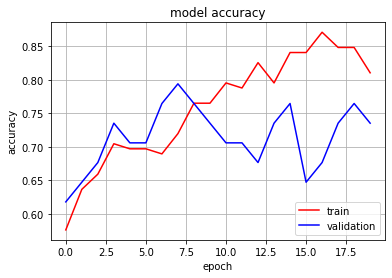

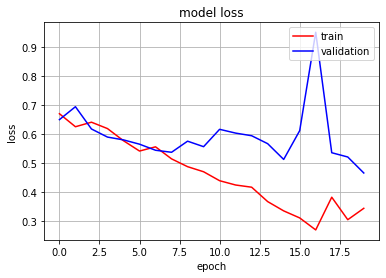

In [327]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Y_pred = model.predict(X_test_encoded_df)
y_pred = argmax(Y_pred, axis=1)
# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test_encoded_df, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)
y_test_list = y_test['class'].tolist()
y_test_list
confusion_mtx = confusion_matrix(y_test_list, y_pred)
print("confusion matrix=\n", confusion_mtx)